<class 'numpy.ndarray'>
(768,)


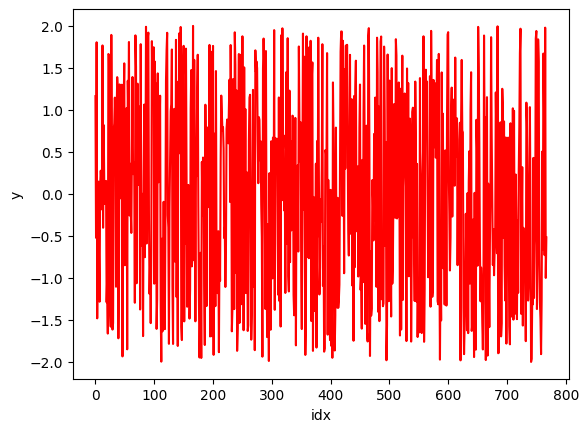

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand


def test_draw():
    ar = [np.random.uniform(-2, 2) for i in range(768)]
    y = np.array(ar)
    print(type(y))
    print(y.shape)
    x = [i for i in range(768)]
    
    
    
    # plt.plot(x, y)
    plt.xlabel("idx")
    plt.ylabel("y")
    plt.plot(x, y, c='r')
    plt.show()
test_draw()

In [3]:
# print(len(target_method_list))
# print(len(tokens_ids_list))
# print(len(embeded_tokens)
# print(embeded_tokens[0].shape)
# print(embeded_tokens[100].shape)

from oms.dataset.function_info import FunctionInfo


#필요할 때마다 벡터 생성하기 위해 bert를 드
import torch
from transformers import RobertaTokenizer, RobertaConfig, RobertaModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = RobertaTokenizer.from_pretrained("microsoft/longcoder-base")
model = RobertaModel.from_pretrained("microsoft/longcoder-base")
model.to(device)



#일단 클래스로 관리
class EmbededMethodInfo:
    def __init__(self):
        pass
        
    @staticmethod
    def from_dict(data_dict):
        # data_dict에서 EmbededMethodInfo 객체를 생성하는 메서드
        obj = EmbededMethodInfo.__new__(EmbededMethodInfo)
        obj.src_name = data_dict['src_name']  # 복원 방식은 fun_info 객체의 구조에 따라 조정 필요
        obj.str_tokens = data_dict['str_tokens']
        obj.token_length = len(obj.str_tokens)
        obj.str_padded_tokens = data_dict['str_padded_tokens']
        obj.nId_tokens = torch.tensor(data_dict['nId_tokens'])
        obj.vec_tokens = None #torch.tensor(data_dict['vec_tokens']) if data_dict['vec_tokens'] is not None else None
        obj.attention_mask = torch.tensor(data_dict['attention_mask'])
        # obj.str_tk_map = defaultdict(list, data_dict['str_tk_map'])
        return obj

    def get_vec_tokens(self):
        if self.vec_tokens != None:
            return self.vec_tokens
        else:
            cuda_attention_mask = self.attention_mask[None,:].to('cuda')
            cuda_nId_tokens = self.nId_tokens[None,:].to('cuda')

            print("att : ", cuda_attention_mask.shape)
            print("nid : ", cuda_nId_tokens.shape)
            # print("att : ", cuda_attention_mask.shape)

            
            cuda_context_embeddings = model(cuda_nId_tokens, attention_mask=cuda_attention_mask)[0] #cuda_context_embeddings (6987, 678)
            self.vec_tokens = cuda_context_embeddings.to('cpu')[0]
            del cuda_nId_tokens
            del cuda_context_embeddings
            del cuda_attention_mask
            return self.vec_tokens
    
    # def __init_by_method(self, fun_info: FunctionInfo, tokenizer:RobertaTokenizer):
    #     self.fun_info: FunctionInfo = fun_info
    #     self.str_tokens: [str] = [tokenizer.cls_token] + tokenizer.tokenize(fun_info.code) + [tokenizer.eos_token]
    #     self.token_length: int = len(self.str_tokens) #padd 제외한 길이 (원래 길이 + 2(st,ed))
    #     self.str_padded_tokens: [str] = self.str_tokens + [tokenizer.pad_token for _ in range(BERT_MAX_SIZE-self.token_length)]

    #     self.nId_tokens : [int] = tokenizer.convert_tokens_to_ids(self.str_padded_tokens)
    #     self.vec_tokens : [torch.tensor] = None

    #     self.attention_mask = [1 for _ in range(self.token_length)] + [0 for _ in range(BERT_MAX_SIZE-self.token_length)]
            
    #     self.str_tk_map = defaultdict(list)
    #     for i, token in enumerate(self.str_tokens):
    #         self.str_tk_map[token].append(i)

# t_start = time.time()
# DataSet = []
# for m in method_list:
#     EmbededMethodInfo(m, tokenizer)
#     DataSet.append(EmbededMethodInfo(m, tokenizer))
# t_end = time.time()

# print(len(DataSet), " make data set ", (t_end-t_start), " time")        

C:\dev\Anaconda\envs\T1\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
You are using a model of type longformer to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
C:\dev\Anaconda\envs\T1\Lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:

import json
with open('2024-08-26-input_infos.json', 'r') as json_file:
    di_list = json.load(json_file)

    embeded_info_list = [EmbededMethodInfo.from_dict(data) for data in di_list]
d = embeded_info_list[0]
print(d)


<class 'numpy.ndarray'>
(768,)


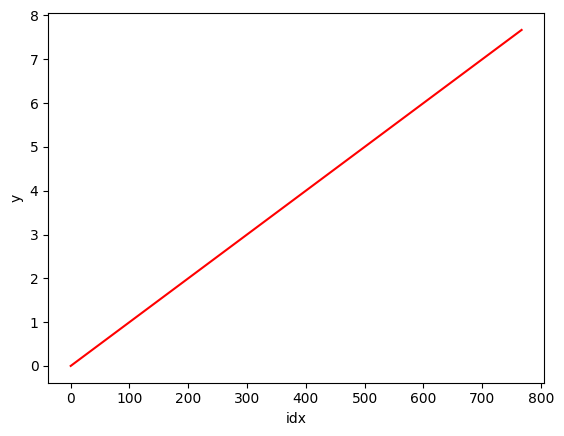

In [9]:
di_list[0].keys()
test_draw()

torch.Size([2049, 768])
<class 'numpy.ndarray'>
 min_val, min_idx =  -28.99 , 530
 max_val, max_idx =  5.48 , 242
 avg_val =  -0.03
<class 'numpy.float64'>
x/y len(768/768)


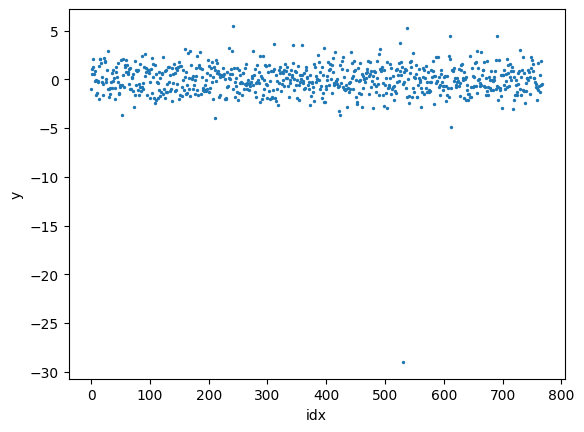

att :  torch.Size([1, 2049])
nid :  torch.Size([1, 2049])
torch.Size([2049, 768])
<class 'numpy.ndarray'>
 min_val, min_idx =  -20.06 , 530
 max_val, max_idx =  5.09 , 713
 avg_val =  -0.03
<class 'numpy.float64'>
x/y len(768/768)


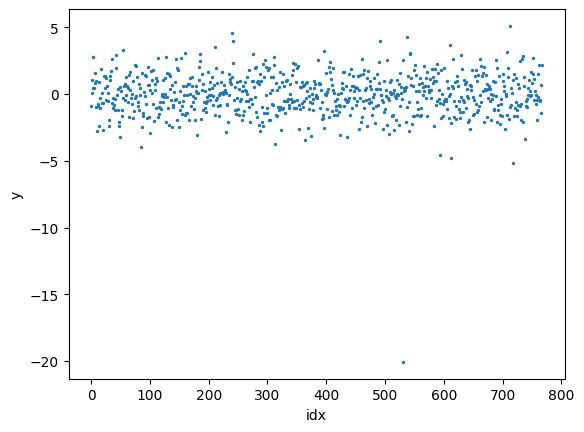

In [22]:
import matplotlib.pyplot as plt
import numpy as np
def draw_1x768(embeded_info: EmbededMethodInfo, idx=0, sample_rate=10):
    vec_tokens = embeded_info.get_vec_tokens()
    print(vec_tokens.shape)  # torch.Size([2049, 768])
    
    y = np.array([d.item() for d in vec_tokens[idx]])  # 샘플링
    x = np.arange(len(y))

    print(type(y))
    # print(y)

    min_val, min_idx =  vec_tokens[idx].min(dim=0)
    print(f" min_val, min_idx =  {min_val:.2f} , {min_idx}")
    
    max_val, max_idx =  vec_tokens[idx].max(dim=0)
    print(f" max_val, max_idx =  {max_val:.2f} , {max_idx}")
    
    avg_val =  vec_tokens[idx].mean(dim=0)
    print(f" avg_val =  {avg_val:.2f}")
    
    
    print(type(y[0]))

    print(f"x/y len({len(x)}/{len(y)})")

    plt.scatter(x, y , s=2)
    plt.xlabel("idx")
    plt.ylabel("y")
    plt.show()
tokens_vect = embeded_info_list[25].get_vec_tokens()
draw_1x768(embeded_info_list[25])
# print(tokens_vect)
# vect = tokens_vect[0]
# print(vect.shape) #torch.Size([768])
draw_1x768(embeded_info_list[20])


(171/1878 tks/pad) : CCommandSmoothing.SetCircleRangeMarkParam()
att :  torch.Size([1, 2049])
nid :  torch.Size([1, 2049])
4


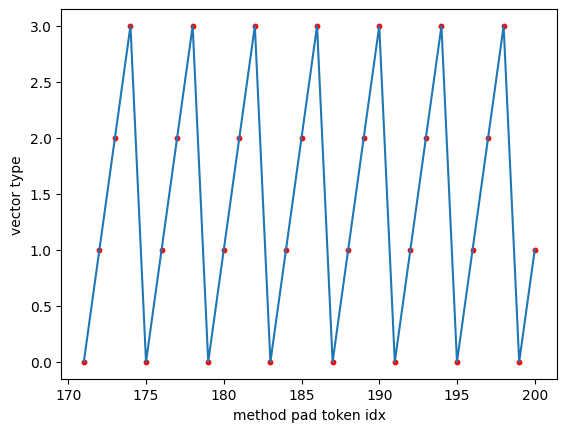

In [90]:
def get_pad_vectors_set(embeded_info: EmbededMethodInfo):
    pad_vectors_set = []
    def is_in_pad_vector(d:torch.tensor):
        for idx, pair in enumerate(pad_vectors_set):
            if d.equal(pair[0]):
                return idx
            else:
                continue
        return -1
    
    print(f"({embeded_info.token_length}/{len(embeded_info.str_padded_tokens)-embeded_info.token_length} tks/pad) : {embeded_info.src_name}")
    
    embeded_tokens = embeded_info.get_vec_tokens()
    for i in range(embeded_info.token_length, len(embeded_info.str_padded_tokens)):
        v = embeded_tokens[i]
        idx = is_in_pad_vector(v)
        if idx == -1:
            pad_vectors_set.append([v, [i]])
        else:
            pad_vectors_set[idx][1].append(i)
    return pad_vectors_set
            
def darw_pad_type(pad_vectors_set:[[torch.tensor, [int]]]):
    idx_type_map = {}
    for pad_type, data_pair in enumerate(pad_vectors_set):
        for idx in data_pair[1]:
            idx_type_map[idx] = pad_type

    x = list(sorted(idx_type_map.keys()))[:30]
    y = [idx_type_map[i] for i in x]

    # print(x)
    
    plt.scatter(x, y, c='r',s=10)
    plt.plot(x, y)
    plt.xlabel("method pad token idx")
    plt.ylabel("vector type")
    plt.show()



pad_vectors_set = get_pad_vectors_set(embeded_info_list[60])
print(len(pad_vectors_set))
darw_pad_type(pad_vectors_set)

In [66]:
from collections import defaultdict
def parse_dim_data(embeded_info: EmbededMethodInfo):
    print(f"({embeded_info.token_length} tks) : {embeded_info.src_name}")
    embeded_tokens = embeded_info.get_vec_tokens().to('cuda') # [2048, 768]
    mmm_datas = defaultdict(list)
    for dim_idx in range(768): #bert 기반이니 768차원
        dim_tks=embeded_tokens[:, dim_idx]
        print('\r', dim_tks.shape, end="") #[2048, 1]

        max_val = dim_tks.max()
        min_val = dim_tks.min()
        mean_val = dim_tks.mean()

        mmm_datas['min'].append(min_val.item())
        mmm_datas['mean'].append(mean_val.item())
        mmm_datas['max'].append(max_val.item())
    return mmm_datas


# mmm_datas = parse_dim_data(embeded_info_list[25])
embeded_tokens = embeded_info_list[25].get_vec_tokens()
pad_tokens = embeded_tokens[101]  # [768]
not_eq_list = []
sim_set = set()

# 첫 번째 루프: 유사도 계산 및 일치하지 않는 벡터 찾기
for i in range(101, 2048):
    sim = torch.cosine_similarity(pad_tokens, embeded_tokens[i], dim=0)  # 유사도 측정
    sim_set.add(sim.item())
    
    if not pad_tokens.equal(embeded_tokens[i]):  # [768] == [768]
        not_eq_list.append(i)

print(len(not_eq_list))
print("\n유사도:")
print(len(sim_set))

# 두 번째 패딩 벡터로 재측정
pad_tokens_pair = [pad_tokens]
pad_tokens = embeded_tokens[not_eq_list[0]]
pad_tokens_pair.append(pad_tokens)
sim_set = set()
new_not_eq_list = []

for i in not_eq_list:
    sim = torch.cosine_similarity(pad_tokens, embeded_tokens[i], dim=0)  # 유사도 측정
    sim_set.add(sim.item())
    
    if not pad_tokens.equal(embeded_tokens[i]):  # [768] == [768]
        new_not_eq_list.append(i)

print(len(new_not_eq_list))
print("\n유사도:")
print(len(sim_set))

# 마지막 반복문: 최종 확인
final_not_eq_list = []
for i in range(101, 2048):
    v = embeded_tokens[i]
    if pad_tokens_pair[0].equal(v) or pad_tokens_pair[1].equal(v):  # [768] == [768]
        continue
    else:
        final_not_eq_list.append(i)

print(len(final_not_eq_list))

1460

유사도:
2
973

유사도:
2
973


torch.Size([2049, 768])
-28.99 , 530 =  min_val, min_idx = -5.93 , 210
5.48 , 242 =  max_val, max_idx = 10.34 , 530
 -0.03 = avg_val = 0.04


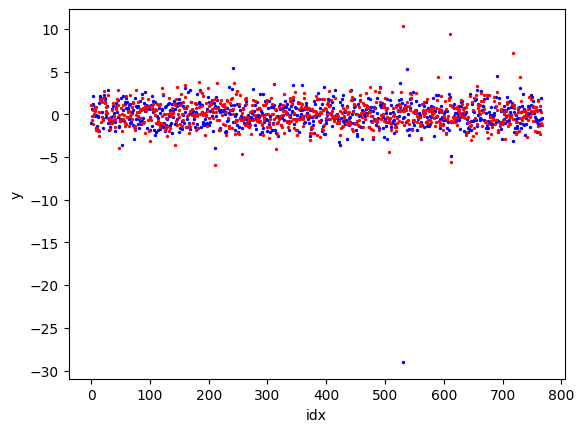

In [36]:
import matplotlib.pyplot as plt
import numpy as np
def draw_1x768(embeded_info: EmbededMethodInfo):
    vec_tokens = embeded_info.get_vec_tokens()
    print(vec_tokens.shape)  # torch.Size([2049, 768])
    idx = 0
    cr_idx = 0
    print_data = []
    colors = ['b', 'r', 'y']

    np_y_list = []
    
    for idx in [0, int(embeded_info.token_length/2)]:
        y = np.array([d.item() for d in vec_tokens[idx]])  # 샘플링
        x = np.arange(len(y))
    
        min_val, min_idx =  vec_tokens[idx].min(dim=0)
        # print(f" min_val, min_idx =  {min_val:.2f} , {min_idx}")
        
        max_val, max_idx =  vec_tokens[idx].max(dim=0)
        # print(f" max_val, max_idx =  {max_val:.2f} , {max_idx}")
        
        avg_val =  vec_tokens[idx].mean(dim=0)
        # print(f" avg_val =  {avg_val:.2f}")

        print_data.append(  (min_val, min_idx, max_val, max_idx, avg_val) )
        
        # print(type(y[0]))
    
        # print(f"x/y len({len(x)}/{len(y)})")
    
        plt.scatter(x, y, c=colors[cr_idx], s=2)
        plt.xlabel("idx")
        plt.ylabel("y")
        np_y_list.append(y)
        cr_idx += 1

    print(f"{print_data[0][0]:.2f} , {print_data[0][1]} =  min_val, min_idx = {print_data[1][0]:.2f} , {print_data[1][1]}") 
    print(f"{print_data[0][2]:.2f} , {print_data[0][3]} =  max_val, max_idx = {print_data[1][2]:.2f} , {print_data[1][3]}") 
    print(f" {print_data[0][4]:.2f} = avg_val = {print_data[1][4]:.2f}")

    # dif_y = np_y_list[0] - np_y_list[1]
    # ax = plt.subplot()
    # ax.plot(x, dif_y, c=colors[cr_idx])

    
    plt.show()


tokens_vect = embeded_info_list[25].get_vec_tokens()
draw_1x768(embeded_info_list[25])
# print(tokens_vect)
# vect = tokens_vect[0]
# print(vect.shape) #torch.Size([768])

C:\Users\B\AppData\Local\Temp\ipykernel_27124\2092504498.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, s=0.2)


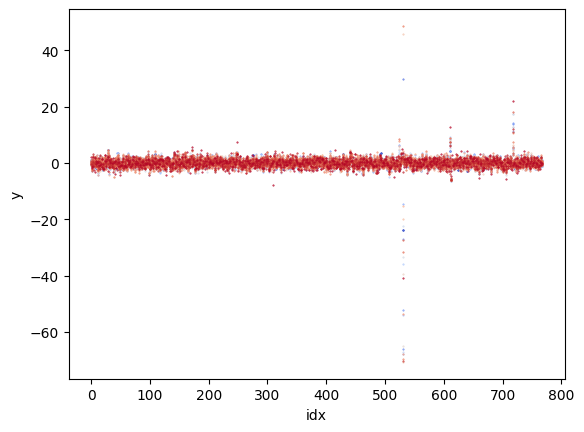

In [41]:
def draw_TKLx768(embeded_info: EmbededMethodInfo):
    vec_tokens = embeded_info.get_vec_tokens()
    
    # 컬러맵 설정: 파란색에서 빨간색으로 변하는 coolwarm 컬러맵 사용
    cmap = plt.cm.coolwarm
    norm = plt.Normalize(vmin=0, vmax=embeded_info.token_length - 1)

    np_y_list = []
    
    for idx in range(embeded_info.token_length):
        y = np.array([d.item() for d in vec_tokens[idx]])  # 샘플링
        x = np.arange(len(y))
    
        # min_val, min_idx = vec_tokens[idx].min(dim=0)
        # max_val, max_idx = vec_tokens[idx].max(dim=0)
        # avg_val = vec_tokens[idx].mean(dim=0)

        # print_data.append((min_val, min_idx, max_val, max_idx, avg_val, idx))
        
        color = cmap(norm(idx))
        plt.scatter(x, y, c=color, s=0.2)
        plt.xlabel("idx")
        plt.ylabel("y")
        np_y_list.append(y)
    plt.show()
draw_TKLx768(embeded_info_list[1024])

In [ ]:
vect = tokens_vect[0]
print("tokens_vect : ", tokens_vect.shape)
print(vect.shape)
print(vect)
np_vec=vect.detach().numpy() 
print("====after=====")
print(vect.shape)
print(vect)
print("====numpy=====")
print(type(np_vec))
print(np_vec.shape)
print(np_vec)

In [5]:
#텐서 파일 로드. 상당히 오래 걸림
# load_tensor = torch.load('2024-08-26-tensor.pth')

In [6]:
# print(len(embeded_info_list))
# print(load_tensor.shape)
# for idx, data in enumerate(embeded_info_list):
#     data.vec_tokens = load_tensor[idx]

In [7]:
# means = load_tensor.mean(dim = [1, 2])

In [8]:
# cuda_load_tensor = load_tensor.to('cuda')

In [9]:
# import time
# st_time = time.time
# cuda_load_tensor.mean(dim = [1, 2])
# ed_time = time.time

In [2]:
# for i in range(embeded_info_list[25].token_length):
#     print(embeded_info_list[25].str_padded_tokens[i])
embeded_info_list[25].vec_tokens

NameError: name 'embeded_info_list' is not defined

In [1]:
import matplotlib.pyplot as plt
import numpy
def draw_1x768(vecs):
    y = vecs.detach().numpy() 
    x = [i for i in range(len(vecs))]

    # print(x)
    print(type(y))
    print(y.shape)
    # return
    plt.plot(x, y)
    plt.xlabel("idx")
    plt.ylabel("y")
    plt.scatter(x, y, c='r')
    plt.show()
tokens_vect = embeded_info_list[25].get_vec_tokens()
print(tokens_vect)
# vect = tokens_vect[0]
# print(vect.shape) #torch.Size([768])
# draw_1x768(vect)

NameError: name 'embeded_info_list' is not defined

In [ ]:
import gc
gc.collect()

In [ ]:
for i in r

In [ ]:
def data2MAMI(data:EmbededMethodInfo):
    # reduced_data = torch.zeros(6863, 2049, 4)
    reduced_datas = []

    for token_idx in range(data.token_length):
        print(f"\rprogress {token_idx}/{data.token_length} {(token_idx/data.token_length)*100:.2f}%", end=" ")
        reduce_tokens = [10, -10, 0, 0]
        token_vector = data.vec_tokens[token_idx]

        min_val, min_idx = token_vector.min(dim=0)

        max_val, max_idx = token_vector.max(dim=0)

        avg_val = token_vector.mean(dim=0)
        
        # print(data.vec_tokens.shape)
        print(token_vector.shape)
        return
    #     if reduce_data[0] < v:
        
            
        
    
    # for i in range(len(embeded_data_list)):
    #     print(f"\rprogress {i}/{len(data)} {i/len(data)*100:.2f}%", end=" ")
    #     for j in range(len(data[i])):
    #         vec = data[i, j, :]  # 각 벡터: [768] 크기
    #         # print(vec.shape)
    #         # return
            
    #         # 최소값 및 인덱스
    #         min_val, min_idx = vec.min(dim=0)
            
    #         # 최대값 및 인덱스
    #         max_val, max_idx = vec.max(dim=0)
            
    #         # 평균값
    #         avg_val = vec.mean(dim=0)
            
    #         # 평균값에 가장 가까운 인덱스
    #         avg_idx = torch.argmin((vec - avg_val).abs())
            
    #         # 새로운 4차원 벡터 구성
    #         reduced_data[i, j, 0] = min_val
    #         reduced_data[i, j, 1] = avg_val
    #         reduced_data[i, j, 2] = max_val
            
    #         # 인덱스 정보로 계산된 값
    #         idx_info = float(f"{max_idx.item()}.{min_idx.item()}")
    #         reduced_data[i, j, 3] = idx_info
            
data2MAMI(embeded_info_list[25])

# 결과 크기 확인
# print(reduced_data.shape)  # torch.Size([6863, 2049, 4])

In [ ]:
from sklearn.manifold import TSNE
    tsne = TSNE(n_components=3, init='pca', learning_rate='auto', n_iter=1000, random_state=42)
    tsne_xy = tsne.fit_transform(n_datas)

    # 결과 시각화 (t-SNE)
    plt.scatter(tsne_xy[:, 0], tsne_xy[:, 1], marker='o', edgecolor='k', s=50)
    plt.title('t-SNE Result')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.savefig("t-sne.png")
    plt.show()

    return tsne_xy, org_datas

In [ ]:
def test(torch_datas: torch.tensor):
    """
    tsne를 사용하여 데이터를 3차원으로
    get_numpy_array 로 원본 데이터를 ndarray화 하고
    복사하여 정규화, 필터링 처리
    그리고 2d로 차원 축소한 결과와 원본을 반환
    :return: convert2d_xy, org_datas
    """
    from sklearn.preprocessing import StandardScaler
    scalar_means = torch_datas.mean(dim=[1,2])
    
    
    org_datas = self.get_numpy_array()
    scaler = StandardScaler()

    filter_datas = np.delete(org_datas, 0, axis=1)
    n_datas = scaler.fit_transform(filter_datas)

    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, init='pca', learning_rate='auto', n_iter=1000, random_state=42)
    tsne_xy = tsne.fit_transform(n_datas)

    # 결과 시각화 (t-SNE)
    plt.scatter(tsne_xy[:, 0], tsne_xy[:, 1], marker='o', edgecolor='k', s=50)
    plt.title('t-SNE Result')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.savefig("t-sne.png")
    plt.show()

    return tsne_xy, org_datas

In [76]:
size = 1 * 2 * 3 * 4
t1 = torch.tensor([float(i) for i in range(size)])
t1 = t1.reshape(1, 2, 3, 4)

t2 = torch.tensor([float(-i) for i in range(size)])
t2 = t2.reshape(1, 2, 3, 4)


t = torch.cat((t1, t2), dim= 0)
print("data : ", t)

m = t.max(dim=2)
print("max:")
print(m)

end=t.mean(dim=[0, 2, 3 ])
print("mean:")
print(end)




data :  tensor([[[[  0.,   1.,   2.,   3.],
          [  4.,   5.,   6.,   7.],
          [  8.,   9.,  10.,  11.]],

         [[ 12.,  13.,  14.,  15.],
          [ 16.,  17.,  18.,  19.],
          [ 20.,  21.,  22.,  23.]]],


        [[[  0.,  -1.,  -2.,  -3.],
          [ -4.,  -5.,  -6.,  -7.],
          [ -8.,  -9., -10., -11.]],

         [[-12., -13., -14., -15.],
          [-16., -17., -18., -19.],
          [-20., -21., -22., -23.]]]])
max:
torch.return_types.max(
values=tensor([[[  8.,   9.,  10.,  11.],
         [ 20.,  21.,  22.,  23.]],

        [[  0.,  -1.,  -2.,  -3.],
         [-12., -13., -14., -15.]]]),
indices=tensor([[[2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0]]]))
mean:
tensor([0., 0.])


In [29]:
t1 = torch.tensor([-i for i in range(6)])
t1=t1.reshape(1, 2, 3)
t2 = torch.tensor([i for i in range(6)])
t2=t2.reshape(1, 2, 3)


In [32]:
t = torch.cat((t1, t2), dim=0)
print(t.shape)
t

torch.Size([2, 2, 3])


tensor([[[ 0, -1, -2],
         [-3, -4, -5]],

        [[ 0,  1,  2],
         [ 3,  4,  5]]])